In [1]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [2]:
import pandas as pd
import io
  
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']),encoding='cp1252')
#print(df)

#df=pd.read_csv(url,encoding='cp1252')

df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.shape

(303, 14)

age (Age in years)

sex : (1 = male, 0 = female)

cp (Chest Pain Type): [ 0: asymptomatic, 1: atypical angina, 2:non-anginal pain, 3: typical angina]

trestbps (Resting Blood Pressure in mm/hg )

chol (Serum Cholesterol in mg/dl)

fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]

restecg (Resting ECG): [0: showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1: normal, 2: having ST-T wave abnormality]

thalach (maximum heart rate achieved)

exang (Exercise Induced Angina): [1 = yes, 0 = no]

oldpeak (ST depression induced by exercise relative to rest)

slope (the slope of the peak exercise ST segment): [0: downsloping; 1: flat; 2: upsloping]

ca [number of major vessels (0–3)

thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]

target: [0 = disease, 1 = no disease]

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Check data type**
The variables types are

Binary: sex, fbs, exang, target

Categorical: cp, restecg, slope, ca, thal

Continuous: age, trestbps, chol, thalac, oldpeak

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [25]:
# to know unique values
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           4
thall         3
output        2
dtype: int64

**Error Correction**
Check for the data characters mistakes
feature ‘ca’ ranges from 0–3, however, df.nunique() listed 0–4. So lets find the ‘4’ and change them to NaN.

In [7]:
df['caa'].unique()

array([0, 2, 1, 3, 4])

In [8]:
 #to count the number in of each category decending order
df.caa.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

In [ ]:
df[df['caa']==4]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [12]:
df.loc[df['caa']==4,'caa']=np.NaN

In [21]:
df['caa'].unique()

array([0., 2., 1., 3.])

Feature ‘thal’ ranges from 1–3, however, df.nunique() listed 0–3. There are two values of ‘0’. So lets change them to NaN

In [26]:
df['thall'].unique()


array([ 1.,  2.,  3., nan])

In [22]:
df.thall.value_counts()

2    165
3    117
1     18
0      2
Name: thall, dtype: int64

In [27]:
df.loc[df['thall']==0,'thall']=np.NaN

In [24]:
df[df['thall']==0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [28]:
df['thall'].unique()

array([ 1.,  2.,  3., nan])

**Check for missing values and replace them**

In [29]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       2
output      0
dtype: int64

In [14]:
df = df.fillna(df.median())
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Check for duplicate rows**

In [16]:
#Check duplicate rows in data
duplicate_rows = df[]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (1, 14)


In [37]:
#we have one duplicate row.
#Removing the duplicate row
df = df.drop_duplicates()
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
#Number of duplicate rows after dropping one duplicate row

Empty DataFrame
Columns: [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output]
Index: []


In [18]:
df.shape


(302, 14)

In [ ]:
#Looking for null values
print("Null values :: ")
print(df.isnull() .sum())

Null values :: 
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [ ]:
#Check if the other data is consistent
df.shape
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.665563,2.327815,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,0.935142,0.583683,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


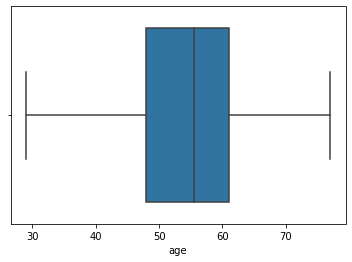

In [ ]:
sns.boxplot(x=df['age'])
#No Outliers observed in 'age'

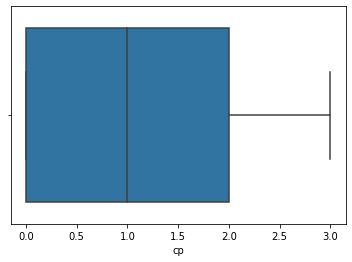

In [ ]:
sns.boxplot(x=df['cp'])
#No outliers in 'cp'

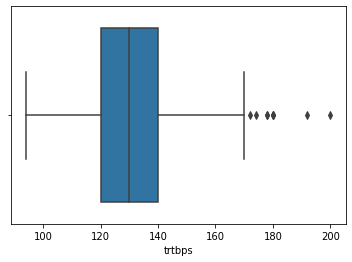

In [ ]:
sns.boxplot(x=df['trtbps'])
#Some outliers are observed in 'trtbps'. They will be removed later

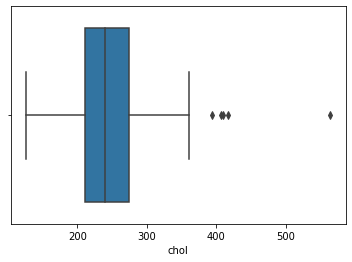

In [ ]:
sns.boxplot(x=df['chol'])

As there are no ‘null’ values in data, we will go ahead with ‘Outlier Detection‘ using box plots.

<Axes: xlabel='thall'>

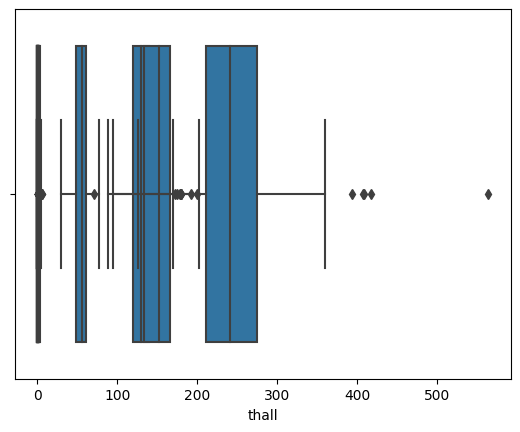

In [38]:
#As there are no null values in data, we can proceed with the next steps.
#Detecting Outliers
# 1. Detecting Outliers using IQR (InterQuartile Range)
sns.boxplot(x=df['age'])
#No Outliers observed in 'age'
sns.boxplot(x=df['sex'])
#No outliers observed in sex data
sns.boxplot(x=df['cp'])
#No outliers in 'cp'
sns.boxplot(x=df['trtbps'])
#Some outliers are observed in 'trtbps'. They will be removed later
sns.boxplot(x=df['chol'])
#Some outliers are observed in 'chol'. They will be removed later
sns.boxplot(x=df['fbs'])
sns.boxplot(x=df['restecg'])
sns.boxplot(x=df['thalachh'])
#Outliers present in thalachh
sns.boxplot(x=df['exng'])
sns.boxplot(x=df['oldpeak'])
#Outliers are present in 'OldPeak'
sns.boxplot(x=df['slp'])
sns.boxplot(x=df['caa'])
#Outliers are present in 'caa'
sns.boxplot(x=df['thall'])

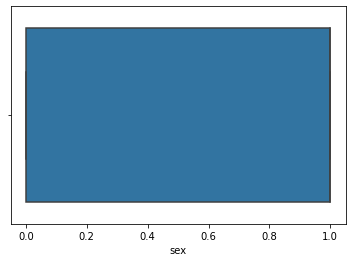

In [ ]:
"sns.boxplot(x=df['sex'])
#No outliers observed in sex data

In [ ]:
df.shape

(302, 14)

From the box plots, outliers are present in trtbps, chol, thalachh, oldpeak, caa, thall.

The Outliers are removed using two methods,

1. Inter-Quartile Range and

2. Z-score

1. Inter-Quartile Range
In IQR, the data points higher than the upper limit and lower than the lower limit are considered outliers.

upper limit = Q3 + 1.5 * IQR

lower limit = Q1 – 1.5 * IQR

In [ ]:
#Find the InterQuartile Range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)
# Remove the outliers using IQR
df2 = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df2.shape

*********** InterQuartile Range ***********
age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        63.75
fbs          0.00
restecg      1.00
thalachh    32.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64


(232, 14)

2. Z – Score
If a Z-score is greater than 3, it implies that the data point differs from the other data points and hence is treated as an outlier.

In [ ]:
#Removing outliers using Z-score
from scipy import stats
z = np.abs(stats.zscore(df))
df3 = df[(z<3).all(axis=1)]
df3.shape

(293, 14)

After using Z-score to detect and remove outliers, the number of records in the dataset is 293. 

As the number of records available is higher after Z-score, we will proceed with ‘df3’

In [ ]:
import numpy as np 

In [36]:
data = [1,2,3,4,5]
data2 = [6,7,8,9,10]

cov = np.cov(data,data2)

mean = np.mean(data)
mean2 = np.mean(data2)

print(mean)
print(mean2)

std = np.std(data)
std2 = np.std(data2)
print(std)
print(std2)

z = (cov) / (std * std2)
z

3.0
8.0
1.4142135623730951
1.4142135623730951


array([[1.25, 1.25],
       [1.25, 1.25]])

In [ ]:
threshold = 3
outlier = []
for i in data:
	z = (i-mean)/std
	if z > threshold:
		outlier.append(i)
print('outlier in dataset is', outlier)


outlier in dataset is [15]


statistical summary
check on the min and max value for the categorical variables (min-max). Sex (0–1), cp (0–3), fbs (0–1), restecg (0–2), exang (0–1), slope (0–2), ca (0–3), thal (0–3).
Observe the mean, std, 25% and 75% on the continuous variables.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.683902,2.337561,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,0.939365,0.590620,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


Text(0.5, 1.0, 'Pearson Correlation')

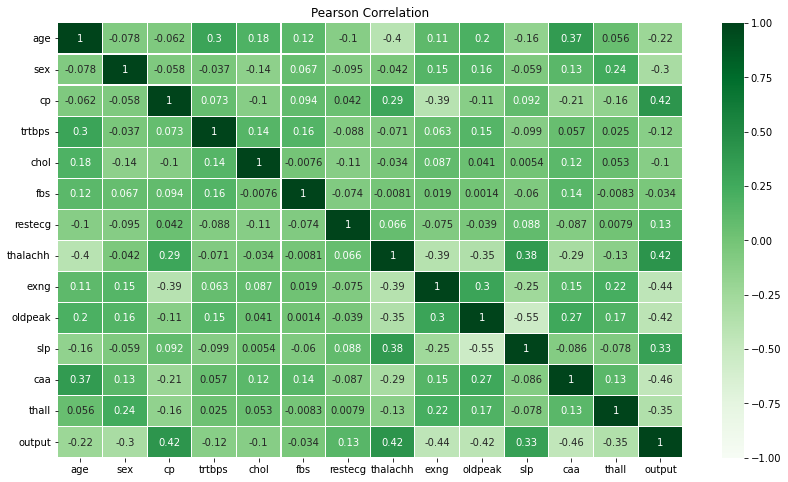

In [ ]:
#Finding the correl.tion between variables
pearsonCorr = df3.corr(method='pearson')
spearmanCorr = df3.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

From the heat map, the same values of correlation are repeated twice. To remove this, we will mask the upper half of the heat map and show only the lower half. The same procedure will be carried out for Spearman Correlation.